In [2]:
import pandas as pd

In [1]:
results_filepath = './alt-right_delete_0.csv'
channels_filepath = '../../communities/alt-right/ribeiro_alt-right.csv'

In [12]:
results_df = pd.read_csv(results_filepath)
results_df.head()

,video_id,channel_id,rank,component,bot_name,phase,phase_level,level,time,watch_video_id
0,qqJ0EZXfbm4,UCNnKprAG-MWLsk-GsbsC2BA,0,homepage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:20.765641,NaN
1,xax6NwLPAkk,UCJW3ePyqjsvKfHGsz7eetQA,1,homepage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:20.765653,NaN
2,qSIC-FWXlnc,UC81VpL_WLXlZZjq88zAAONQ,2,homepage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:20.765655,NaN
3,aNqXZvn6qSI,UCNnQqoYFCqLID3GAMkGtS6A,3,homepage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:20.765657,NaN
4,md8nInMGhFY,UC3Lmytq3AlvcJ-34If_jDyw,4,homepage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:20.765659,NaN


In [13]:
# How many recommendations are from bad channels?
results_df['level'] = results_df.apply(
    lambda row: row['level'] + row['phase_level'] if row['phase']=='scrub' else row['level'],
    axis=1
)
results_df['level'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76])

In [4]:
channels_df = pd.read_csv(channels_filepath, header=None)
channels_df.head()

,0
0,UCSTy-H5lSiCcozas32sfJlQ
1,UCmtALVZjXFzb4v3fIXDmDyw
2,UClMWnUHbxJKJLUgloN1mPUA
3,UC4f8Z2XefBDL421pnNEQH0Q
4,UCFc0stDRUkeBDc36qZeox1g


In [5]:
channels = set(channels_df[0])

In [14]:
# How many recommendations are from bad channels?
results_df['stain'] = results_df.apply(
    lambda row: row['channel_id'] in channels,
    axis=1
)
results_df.groupby(['stain'])['stain'].agg('count')

stain
False    913
True     227
Name: stain, dtype: int64

In [15]:
from util import percentage_true

In [16]:
homepage_df = results_df[results_df['component']=='homepage']

In [17]:
stain_percents = homepage_df.groupby(['level'])['stain'].agg([percentage_true])
stain_percents

,percentage_true
level,
0,0.0
1,0.0
2,0.0
3,0.2
4,0.2
...,...
72,0.2
73,0.1
74,0.1


<AxesSubplot:xlabel='level'>

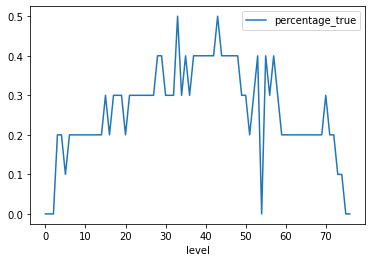

In [18]:
stain_percents.plot()

In [19]:
videopage_df = results_df[results_df['component']=='videopage']
videopage_df.head()

,video_id,channel_id,rank,component,bot_name,phase,phase_level,level,time,watch_video_id,stain
10,rlMFpJNd3-k,UCbsnZhYv_NB31qetOdTTWKA,0,videopage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:39.331884,xuRfQFvhsds,False
11,fWCocjh5aK0,UCsT0YIqwnpJCM-mx7-gSA4Q,1,videopage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:39.331893,xuRfQFvhsds,False
12,Unzc731iCUY,UCEBb1b_L6zDS3xTUrIALZOw,2,videopage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:39.331895,xuRfQFvhsds,False
13,Nzl1BOUjyqE,UCbmNph6atAoGfqLoCL_duAg,3,videopage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:39.331896,xuRfQFvhsds,False
14,qw2nx-I-jAA,UCK7tptUDHh-RYDsdxO1-5QQ,4,videopage,alt-right_delete_0,stain,0,0,2022-05-13 14:26:39.331898,xuRfQFvhsds,False


In [20]:
vp_stain_percents = videopage_df.groupby(['level'])['stain'].agg([percentage_true])
vp_stain_percents

,percentage_true
level,
0,0.0
1,0.0
2,0.4
3,0.3
4,0.1
5,0.1
6,0.0
7,0.3
8,0.0


<AxesSubplot:xlabel='level'>

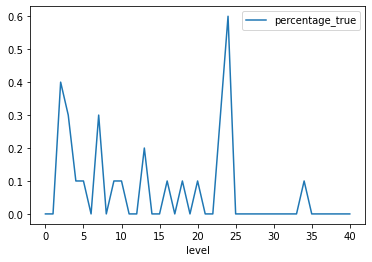

In [21]:
vp_stain_percents.loc[:40].plot()

In [22]:
# Didn't make it to videopage experiment in this round
s1 = vp_stain_percents.loc[0].values[0]
s2 = vp_stain_percents.loc[40].values[0]
s3 = vp_stain_percents.loc[82].values[0]
print('s1: {0}, \n'
      's2: {1}, \n'
      's3: {2}'.format(s1,s2,s3))

KeyError: 82

In [23]:
results_df.groupby(['phase'])['level'].agg('max')

phase
scrub    76
stain    40
Name: level, dtype: int64